<a href="https://colab.research.google.com/github/StellaIbeh/Diabetes_Prediction_Mode-/blob/main/Adaobi_Stella_Ibeh_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summative Assignment_ Diabetes Prediction Model



This project aims to explore the implementation of Machine Learning Models with regularization, optimization, and Error analysis techniques used in machine learning to improve models' performance, convergence speed, and efficiency for the predicction of heart diseases.
Some of the concepts to be covered here are:

Data Exploration and Reprocessing
Data cleaning, handling, and preprocessing
Standarization
Spliting
vanilla Model
Error analysis on Vanilla Model
Evaluation of vanilla model
Optimized model(with atleast 3 optimization techniques)
Error Analysis on Optimized Model
Evaluation of optimized Model
Summarry and discussions of results

In [ ]:
#Necessary Installation
!pip install tensorflow
!pip install keras

In [ ]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout


Mount Drive

In [ ]:
drive.mount ('/content/drive')

Data Exploration


In [ ]:
#load Dataset From Drive
data=pd.read_csv('/content/drive/MyDrive/summative_diabetes/diabetes.csv')

In [ ]:
#Print the first 10 rows of the data
data.head(10)

In [ ]:
#describe data
data.describe()

In [ ]:
#Check for missing values
print(data.isnull().sum())

In [ ]:
#Check the shape of the data
data.shape

In [ ]:
# check the correlation
data.corr()

In [ ]:
#plot Correlation Heatmap for data set
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Diabetes')
plt.show()

In [ ]:
# plot for outliers
plt.figure(figsize=(10,12))
sns.boxplot(data=data)
plt.title('Boxplot for Diabetes')
plt.show()

Data Handling and Preprocessing


In [ ]:
X= data.drop('Outcome', axis=1)
y= data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Standardize data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)






In [ ]:
X_train.shape

In [ ]:
X_test.shape

Train a Simple ML Model without an Optimization Techniques- Vanilla Model


In [ ]:
#Clear previous session
tf.keras.backend.clear_session()

#Constructing the Vanilla Model using Sequential
#defining the model
vanilla_model=Sequential()
#Input Layer
vanilla_model.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))

#First Hidden Layer
vanilla_model.add(Dense(32,activation='relu'))

#Second Hidden Layer
vanilla_model.add(Dense(32,activation='relu'))

#Output Layer
vanilla_model.add(Dense(1,activation='sigmoid'))

#Compile with a simple SDG
vanilla_model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

#Vanilla Model summary
vanilla_model.summary()

# Fit the Model
vanilla_model.fit(X_train,y_train,epochs=200,batch_size=32,validation_data=(X_test,y_test))

#Save the Model
vanilla_model.save('/content/drive/MyDrive/summative_diabetes.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,745 (14.63 KB)

 Trainable params: 3,745 (14.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6484 - loss: 0.6753 - val_accuracy: 0.6429 - val_loss: 0.6721
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6546 - loss: 0.6697 - val_accuracy: 0.6429 - val_loss: 0.6688
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6650 - loss: 0.6621 - val_accuracy: 0.6429 - val_loss: 0.6670
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 0.6732 - val_accuracy: 0.6429 - val_loss: 0.6649
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6540 - loss: 0.6619 - val_accuracy: 0.6429 - val_loss: 0.6633
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6351 - loss: 0.6675 - val_accuracy: 0.6429 - val_loss: 0.6620
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6717 - loss: 0.6484 - val_accuracy: 0.6429 - val_loss: 0.6607
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6550 - loss: 0.6550 - val_accuracy: 0.6429 - 

Evaluating the Vanilla Model


In [ ]:
#Evaluate the Model
test_loss, test_accuracy=vanilla_model.evaluate(X_test,y_test)
print(f"Test Loss: {test_loss}\n, Test Accuracy: {test_accuracy}")

#Make Predictions on the test set
y_pred=vanilla_model.predict(X_test)

# Convert Probabilities to Binary Predictions
y_pred=(y_pred>0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7194 - loss: 0.5204 
Test Loss: 0.507681667804718
, Test Accuracy: 0.7597402334213257
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Error Analysis for Vanilla Model


Confusion Matrix:
[[81 18]
 [19 36]]


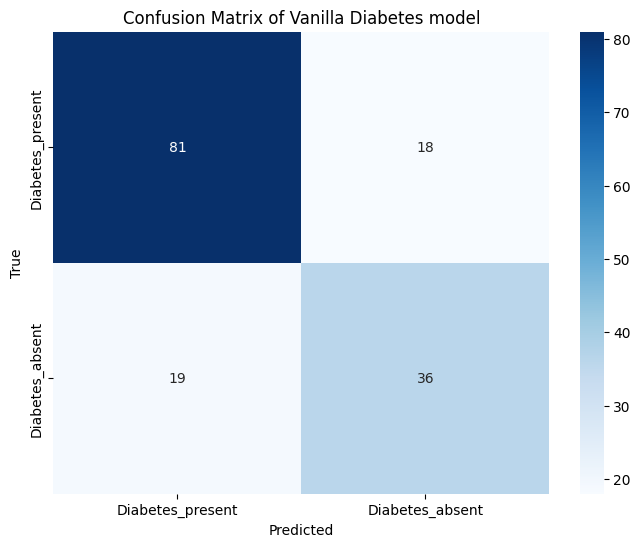

Classification Report:
                  precision    recall  f1-score   support

Diabetes_present       0.81      0.82      0.81        99
 Diabetes_absent       0.67      0.65      0.66        55

        accuracy                           0.76       154
       macro avg       0.74      0.74      0.74       154
    weighted avg       0.76      0.76      0.76       154



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Diabetes_present', 'Diabetes_absent'], yticklabels=['Diabetes_present', 'Diabetes_absent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Vanilla Diabetes model')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Diabetes_present', 'Diabetes_absent']))


OPTIMIZED MODEL
Using this Optimization Techniques
L1 regularization with RMSPOP
L1 With Adam Optimizer
Drop out



In [68]:
# Clear previous session
tf.keras.backend.clear_session()

#Define the model with L1 Regularization with RMSOP Optimizer and Dropout
def create_l1_model(l1_Lambda=0.001, Dropout_rate=0.2):
    #initialize the Sequential model
    model = Sequential() # Initialize the Sequential model
    #Input Layer with l1 Regularization and Dropout
    model.add(Dense(64,activation='relu',input_dim=X_train.shape[1],kernel_regularizer=tf.keras.regularizers.l1(l1_Lambda)))
    model.add(Dropout(0.2))

    #First Hidden Layer with l1 Regularization and Dropout
    model.add(Dense(128,activation='relu',input_shape=(9,1),
                  kernel_regularizer= l1(l1_lamba)))
    model.add(Dropout(0.2))

    # Second hidden layer with l1 Regularization Dropout
    model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1_Lambda)))
    model.add(Dropout(0.2))

    # Output layer with l1 and Dropout
    model.add(Dense(32,kernel_regularizer=tf.keras.regularizers.l1(l1_Lambda)))
    model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l1(l1_Lambda), activation='sigmoid'))
